## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import numpy as np
import pylab as plt
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

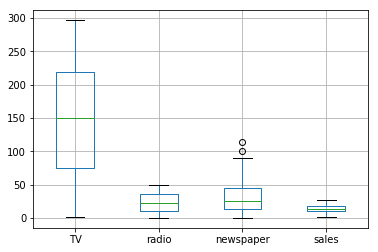

In [3]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

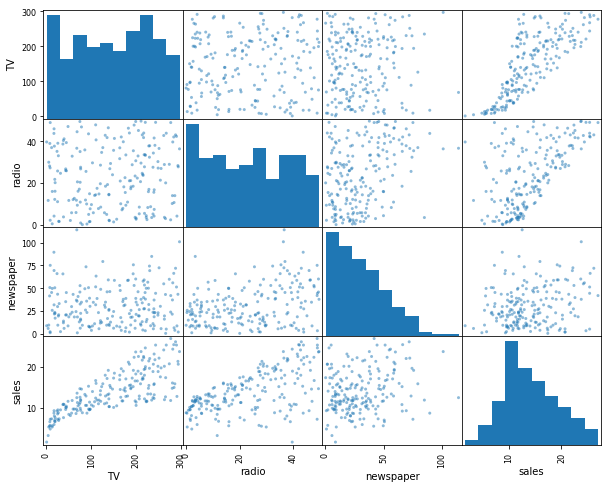

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (10, 8))
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer.

#### Answer:
- Sales variable seems to be correlated with TV and Radio. The scatter plots show that as TV or Radio increases, Sales tends to increase as well.

- TV does not seem to be correlated with Radio or Newspaper, since the data points are scatterly evenly in the corresponding plots.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [5]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [6]:
y = df[['sales']]
y.head()

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


b) Set X to be just the features described above in df

In [7]:
X = df[['TV','radio','newspaper']]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


c) Randomly split data into training and testing - 80% training, 20% testing.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4990)

d) Train model on training data, and make predictions on testing data

In [9]:
# Train model on training data
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions on test data
y_pred = regr.predict(X_test)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [10]:
print('R-squared: %.4f' % regr.score(X_test, y_test))

R-squared: 0.9163


- R-squared evaluated on test data equals 0.9163.
- This is fairly good as about 92% of the variation can be explained by only three predictors: TV, Radio and Newspaper.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

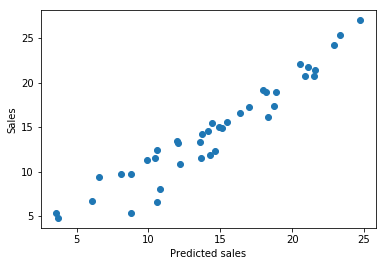

In [11]:
plt.ylabel('Sales')
plt.xlabel('Predicted sales')
plt.scatter(y_pred,y_test['sales'])
plt.show()

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

#### Answer:
Yes, we can measure the importance of features. We should check whether the data have been standardized before making conclusions.
- If the data have been standardized, the magnitude of regression coefficients can show the relative importance of the features.
- However, if the features are not adjusted to a common scale, then the ratio of each coefficient to its standard error would be a useful measure.

The results below are the regression coefficients with standardized data, which suggests that **TV** is the most important feature, and **newspaper** is the least important one.

In [12]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X_train)
y_scaled = preprocessing.scale(y_train)
X_test_scaled = preprocessing.scale(X_test)
y_test_scaled = preprocessing.scale(y_test)
X_scaled = pd.DataFrame(X_scaled, columns = ['TV','radio','newspaper'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns = ['TV','radio','newspaper'])

regr_scaled = LinearRegression()
regr_scaled.fit(X_scaled, y_scaled)

print('Standardized coefficients: ', regr_scaled.coef_)

Standardized coefficients:  [[ 0.75320384  0.55589685  0.00397873]]


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

#### Answer:
- The standardized coefficients can be interpreted as the expected change of one standard deviation unit in the response variable, per standard deviation increase in the predictor variable, controlling for other variables.
- We should make sure that we have standardized the data, before using the regression coefficients to measure the importance of the features.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

#### Answer:
First, according to our finding in part (g), feature **newspaper** with coefficient 0.00397873 is the least important one. Below we delete it from the model and look at the performance of the reduced model.

In [17]:
regr1 = LinearRegression()
regr1.fit(X_train.iloc[:,0:2], y_train)

print('R-squared: %.4f' % regr1.score(X_test.iloc[:,0:2], y_test))

R-squared: 0.9166


Though the reduced model has one less features, the R-squared turns out to be slightly higher. Therefore, we would favor the reduced model. 

Next, try plotting the data in three dimensions.

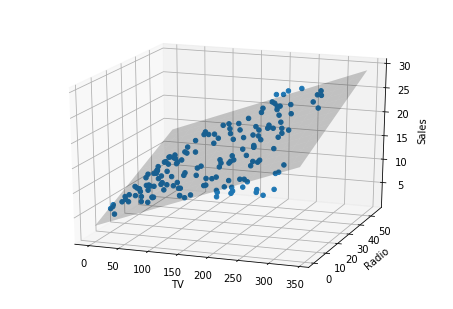

In [18]:
from mpl_toolkits.mplot3d import Axes3D

x_surf, y_surf = np.meshgrid(np.arange(0, 350, 20), np.arange(0, 60, 4))
out = regr1.coef_[0][0]*x_surf + regr1.coef_[0][1]*y_surf + regr1.intercept_

fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(20,-70)
ax.plot_surface(x_surf, y_surf, out, rstride=1, cstride=1, color="None", alpha = 0.2)
ax.scatter(X_train['TV'], X_train['radio'], y_train['sales'],
           marker='o', alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.show()


It can be seen that the data points are lying around a hyperplane which is not parallel to the linear regression hyperplane, that is, the effect of one feature on **Sales** appears to depend on the level of another feature.

So we also consider adding the interaction term **TV*radio**, using the standardized data, into our model.

In [19]:
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_inter = poly.fit_transform(X_scaled.iloc[:,0:2])
X_inter = pd.DataFrame(X_inter, columns = ['TV','radio','TV*radio'])
X_test_inter = poly.fit_transform(X_test_scaled.iloc[:,0:2])
X_test_inter = pd.DataFrame(X_test_inter, columns = ['TV','radio','TV*radio'])

regr_inter = LinearRegression()
regr_inter.fit(X_inter, y_scaled)

print('Coefficients with interactions: ', regr_inter.coef_)
print('R-squared: %.4f' % regr_inter.score(X_test_inter, y_test_scaled))

Coefficients with interactions:  [[ 0.73001361  0.55203616  0.28040491]]
R-squared: 0.9572


Now there are still three features in the model, but with the R-squared equal to 0.9572, which is higher than the original one 0.9163. Therefore, our new model tends to fit the data better.

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

In [20]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, learning_rate):
    points = genfromtxt("../data/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

#### Answer:
- When the learning rate is too small, it would take too many iterations to converge, since we can only move a small distance towards the optimal value in each iteration.
- As we increase the learning rate properly, our method would converge in fewer iterations due to a larger step size.
- However, when the learning rate becomes too large, we might overshoot the optimal solution and our method would never converge.

Below we set learning rate = 0.00005, 0.0003 and 0.0005 respectively, to illustrate how convergence rate is affected by different learning rates.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


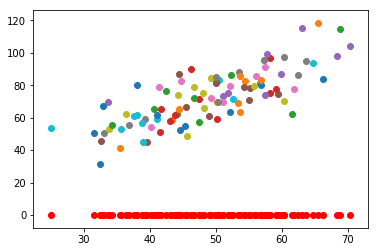

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0072735050553686485, m = 0.3685351486795526, error = 3186.2669183340686


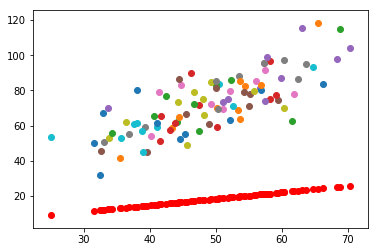

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.01274199579526775, m = 0.6452340122674316, error = 1845.2854193756275


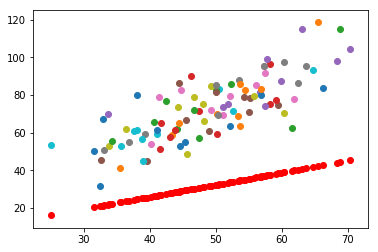

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.016855267941536783, m = 0.8529814900056218, error = 1089.3578680541548


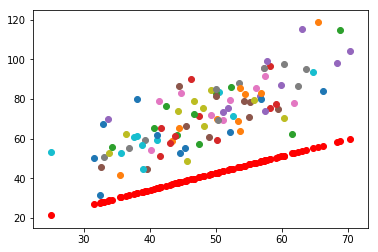

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.019951031565302785, m = 1.0089597394280754, error = 663.2323265001876


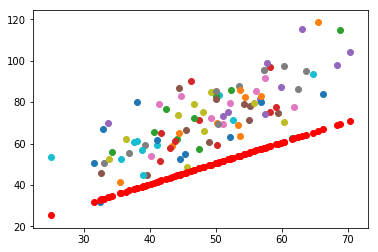

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.022282841973126334, m = 1.1260692559400733, error = 423.02017991777734


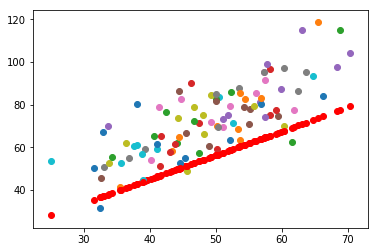

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02404107043012985, m = 1.2139958302447225, error = 287.60967009381125


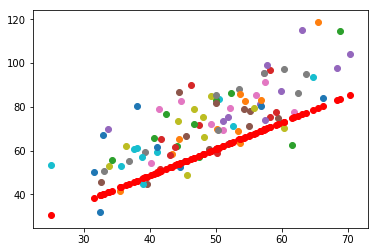

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.025368649139452446, m = 1.2800116281462905, error = 211.27711465249791


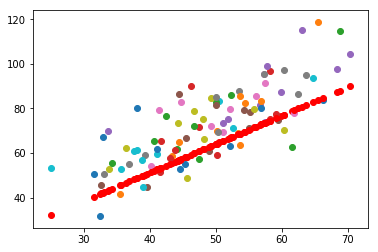

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.026372892693351885, m = 1.329576647398786, error = 168.24751899306284


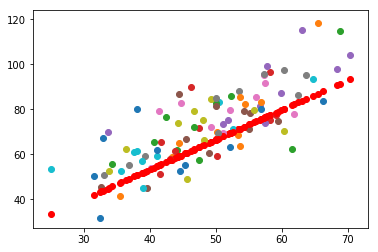

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.02713437370918469, m = 1.366790296112002, error = 143.99120588588545


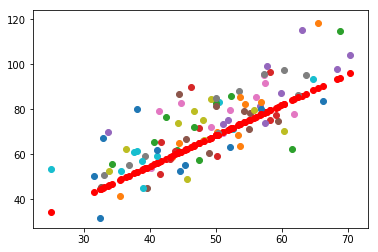

In [21]:
# Use this to visually discuss convergence rate based on learning rate

# learning rate = 0.00005: converge very slowly
for num in range(0,10):
    run(num, 0.00005)
    plt.show()


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


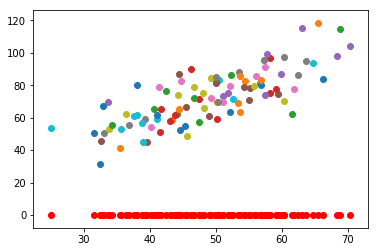

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.04364103033221188, m = 2.2112108920773155, error = 1449.470665944242


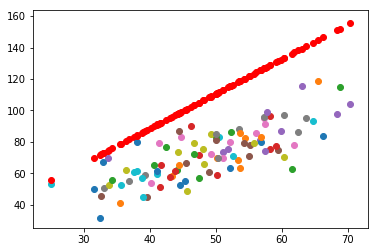

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02230154530752014, m = 1.1163155208543771, error = 440.40873307583655


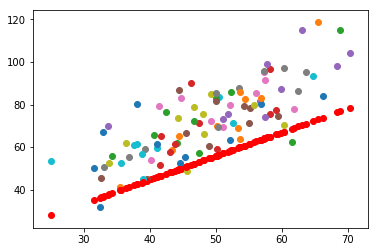

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.03313742084325126, m = 1.6584521225999558, error = 193.00931549266681


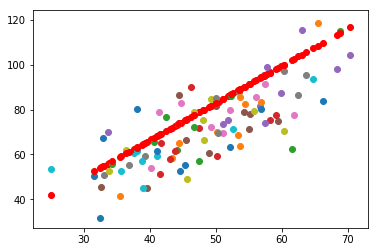

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.02804152953341927, m = 1.3900056799720335, error = 132.3524498162109


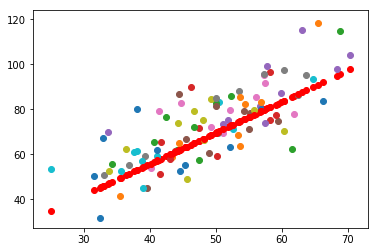

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.030834311319764406, m = 1.5229227311358462, error = 117.48066610837672


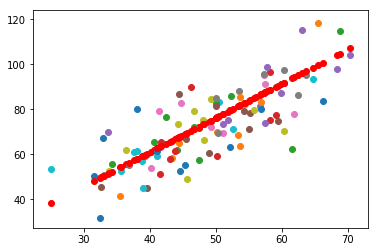

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.029720978410872838, m = 1.4571030148314494, error = 113.8343567768524


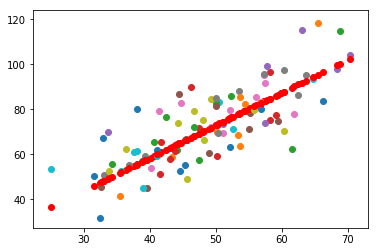

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.030541767989166777, m = 1.4896886179609883, error = 112.94028179073236


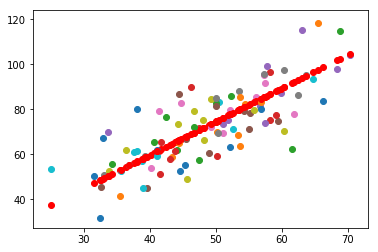

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.03040486284286565, m = 1.4735484267615937, error = 112.72099289110427


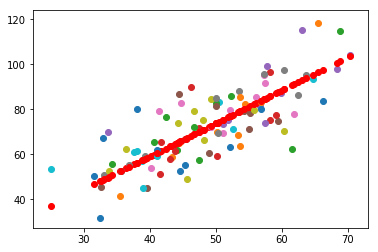

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.030742158034849188, m = 1.4815350110687533, error = 112.66714639683582


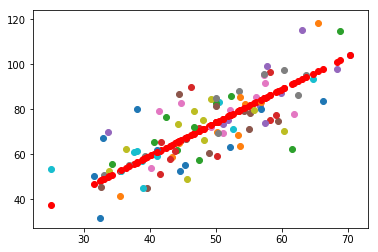

In [22]:
# learning rate = 0.0003: converge faster
for num in range(0,10):
    run(num, 0.0003)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


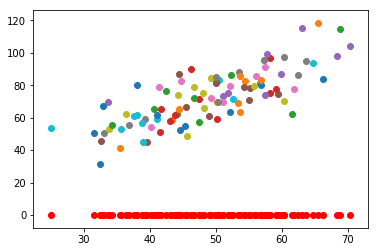

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.07273505055368648, m = 3.685351486795526, error = 12248.923658059466


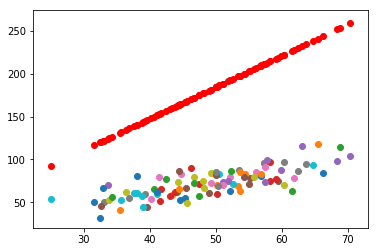

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.03503133043958161, m = -1.812925535576324, error = 27125.9989614646


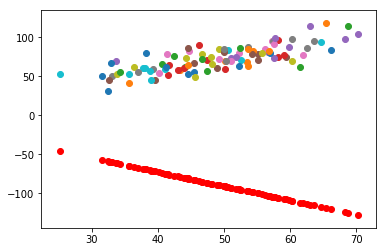

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.12649657885967047, m = 6.390068174869519, error = 60239.92274554496


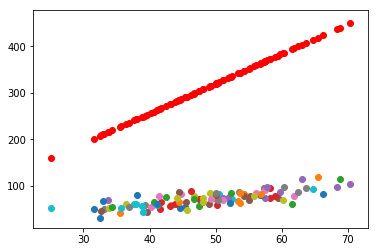

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -0.11374200683340807, m = -5.848185220212095, error = 133946.07277683076


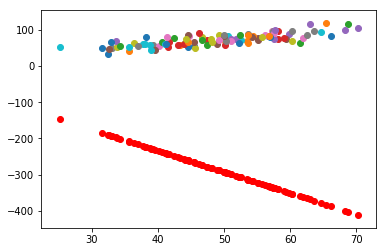

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.24542423466870028, m = 12.410337296692443, error = 298003.84433146904


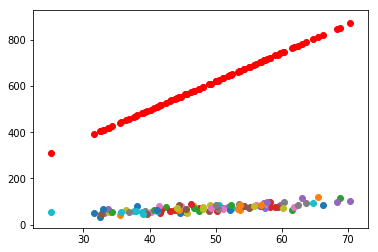

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -0.28967567003687617, m = -14.829995329449478, error = 663169.4699413386


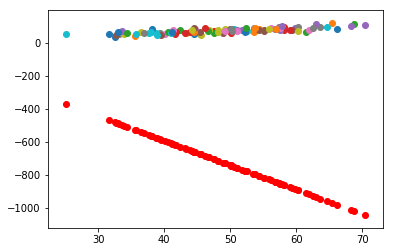

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.5094010313993653, m = 25.81048099761001, error = 1475968.1128761834


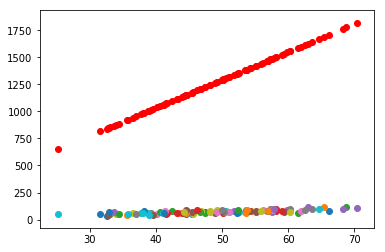

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -0.6820116610464277, m = -34.822013381765444, error = 3285124.253337868


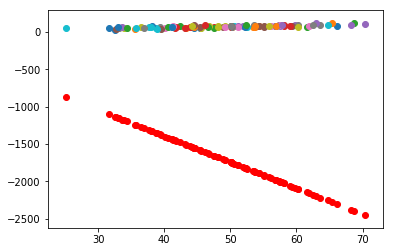

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 1.096233422691767, m = 55.6370121244165, error = 7312008.363935543


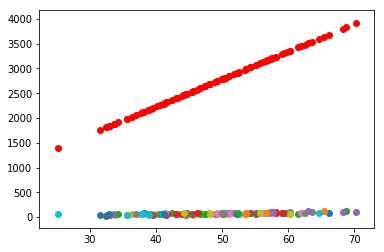

In [23]:
# learning rate = 0.0005: overshoot and never converge
for num in range(0,10):
    run(num, 0.0005)
    plt.show()

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

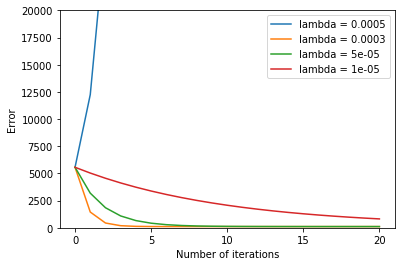

In [24]:
lambdas = [0.0005, 0.0003, 0.00005, 0.00001]
points = genfromtxt("../data/data.csv", delimiter=",")

for learning_rate in lambdas:
    b = 0 # initial y-intercept guess
    m = 0 # initial slope guess
    list_error = [compute_error_for_line_given_points(b, m, points)]
    for num in range(0,20):
        [b, m] = gradient_descent_runner(points, b, m, learning_rate, 1)
        list_error.append(compute_error_for_line_given_points(b, m, points))
    plt.plot(range(0,21), list_error, label='lambda = {i}'.format(i = learning_rate))

plt.ylim(0, 20000)
plt.ylabel('Error')
plt.xlabel('Number of iterations')
plt.xticks(range(0,21,5))
plt.legend(loc='best')
plt.show()

#### Answer:
- A learning rate = 0.00001 seems too small, and it converges very slowly.
- As the learning rate increases to 0.00005 and then 0.0003, it takes fewer and fewer steps to reach the lowest error.
- Finally, learning rate = 0.0005 becomes too large. The error keeps going up and it never converges.